In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import math

### DLA

In [20]:
class DLA:
    def __init__(self):
        self.rmax = 1
        self.state = np.zeros((1001,1001), dtype=int)
        self.history = [[0,0]]
        self.x = 0
        self.y = 0
        self.state[500,500] = 1
        
    def randomwalk(self):
        #Initialize position
        theta = 2*math.pi*random.uniform(0,1)
        x = (self.rmax+5)*math.cos(theta)
        y = (self.rmax+5)*math.sin(theta)
        self.x = round(x)
        self.y = round(y)

        #Walk
        for n in range(1000000):
            self.i = self.x + 500
            self.j = self.y + 500
            #check adjacent
            if (np.sum(self.state[self.i-1:self.i+2,self.j])+np.sum(self.state[self.i,self.j-1:self.j+2]))>0:
                self.state[self.i,self.j] = 1
                self.history.append([self.x,self.y])
                if math.sqrt(self.x**2 + self.y**2)>self.rmax:
                    self.rmax = math.sqrt(self.x**2 + self.y**2)
                break

            #run
            p = random.uniform(0,1)
            if p<0.25:
                self.x += 1
            elif p>0.25 and p<0.5:
                self.x -= 1
            elif p>0.5 and p<0.75:
                self.y += 1
            else:
                self.y -= 1
            
            #Max radius limitation
            if math.sqrt(self.x**2+self.y**2)>max(3*self.rmax, self.rmax+15):
                break
            if n==999999:
                print("Exceed loop limitation")


In [21]:
random.seed(10)
run = DLA()
for n in range(5000):
    if run.rmax>332:
        break
    run.randomwalk()
    if n == 4999:
        print("run for 4999 times")


run for 4999 times


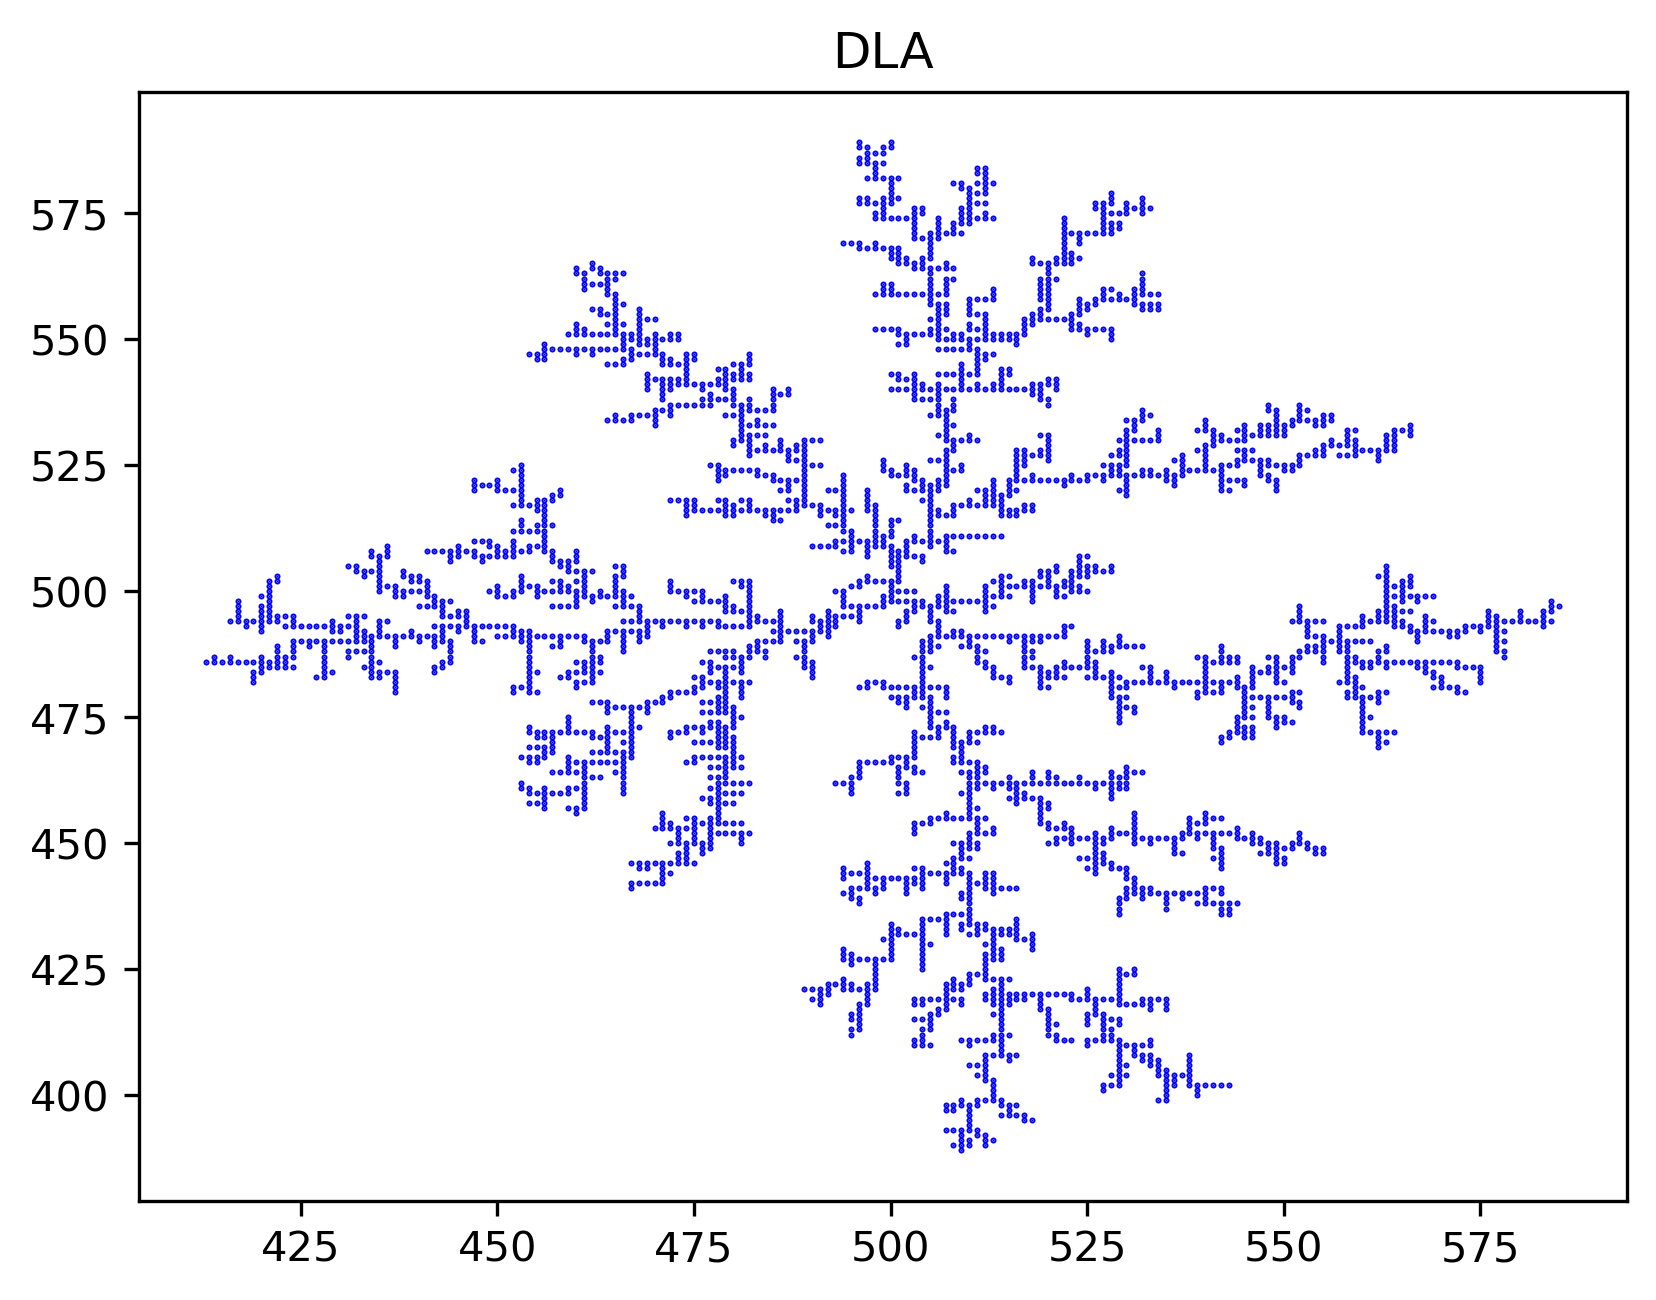

In [22]:
matrix = run.state
# 获取矩阵的行数和列数
rows, cols = matrix.shape

# 创建一个包含所有坐标的列表
x_coords = []
y_coords = []

# 遍历矩阵的每个元素，获取其坐标
for i in range(rows):
    for j in range(cols):
        if matrix[i,j] == 1:
            x_coords.append(i)
            y_coords.append(j)


# 绘制散点图
plt.figure(dpi=300) #分辨率
plt.scatter(x_coords, y_coords, color='blue', s=0.2)#透明度alpha；s点大小
plt.title('DLA')
plt.show()

### Sandbox

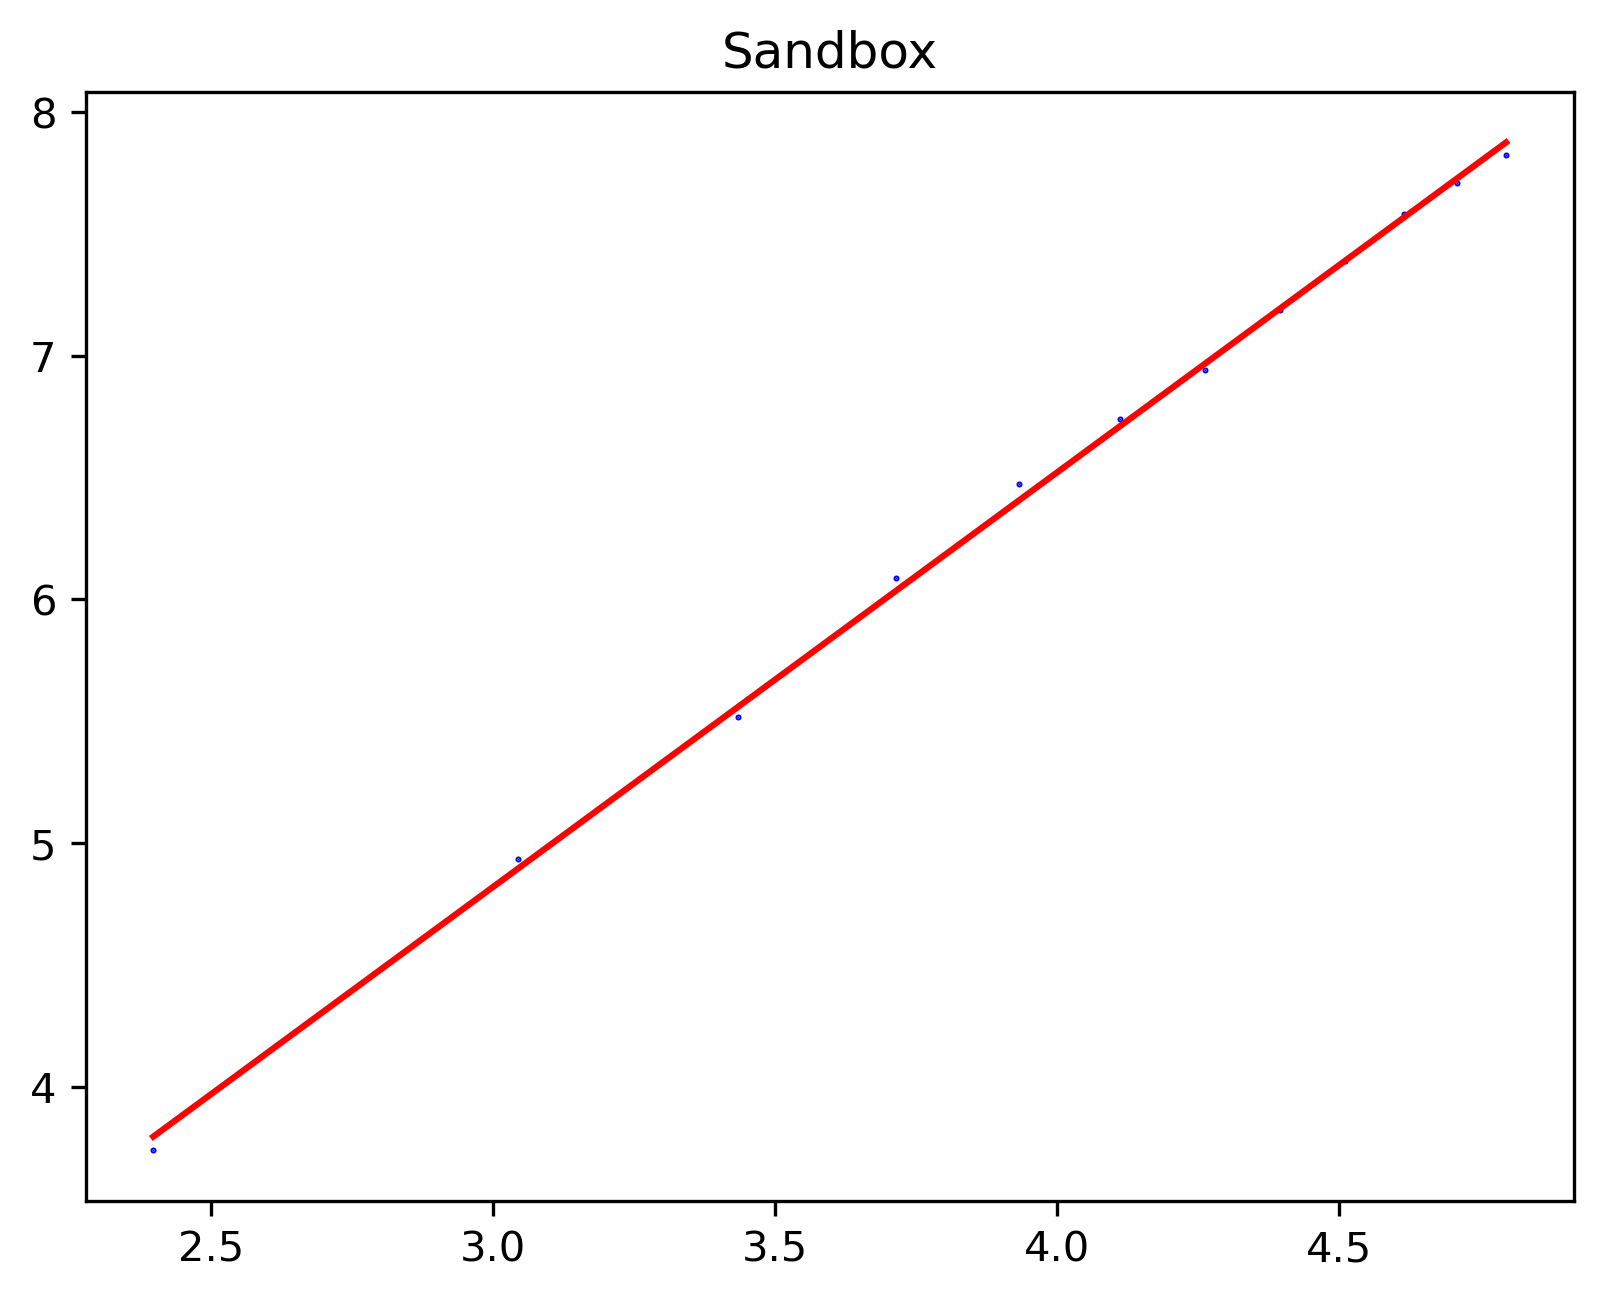

In [27]:
from scipy import stats

r = np.arange(11, 122, 10)
N = np.zeros(len(r),dtype=int)
for i in range(len(r)):
    N[i] = np.sum(run.state[500-(r[i]-1)//2:500+(r[i]+1)//2, 500-(r[i]-1)//2:500+(r[i]+1)//2])

# Perform linear regression on the log-transformed data
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(r), np.log(N))

plt.figure(dpi=300) #分辨率
plt.scatter(np.log(r), np.log(N), color='blue', s=0.2)#透明度alpha；s点大小

# Add the linear regression line to the scatter plot
plt.plot(np.log(r), intercept + slope*np.log(r), color='red')

plt.title('Sandbox')
plt.show()

In [28]:
print(slope)

1.7024991740338902


### 面积-回转半径法

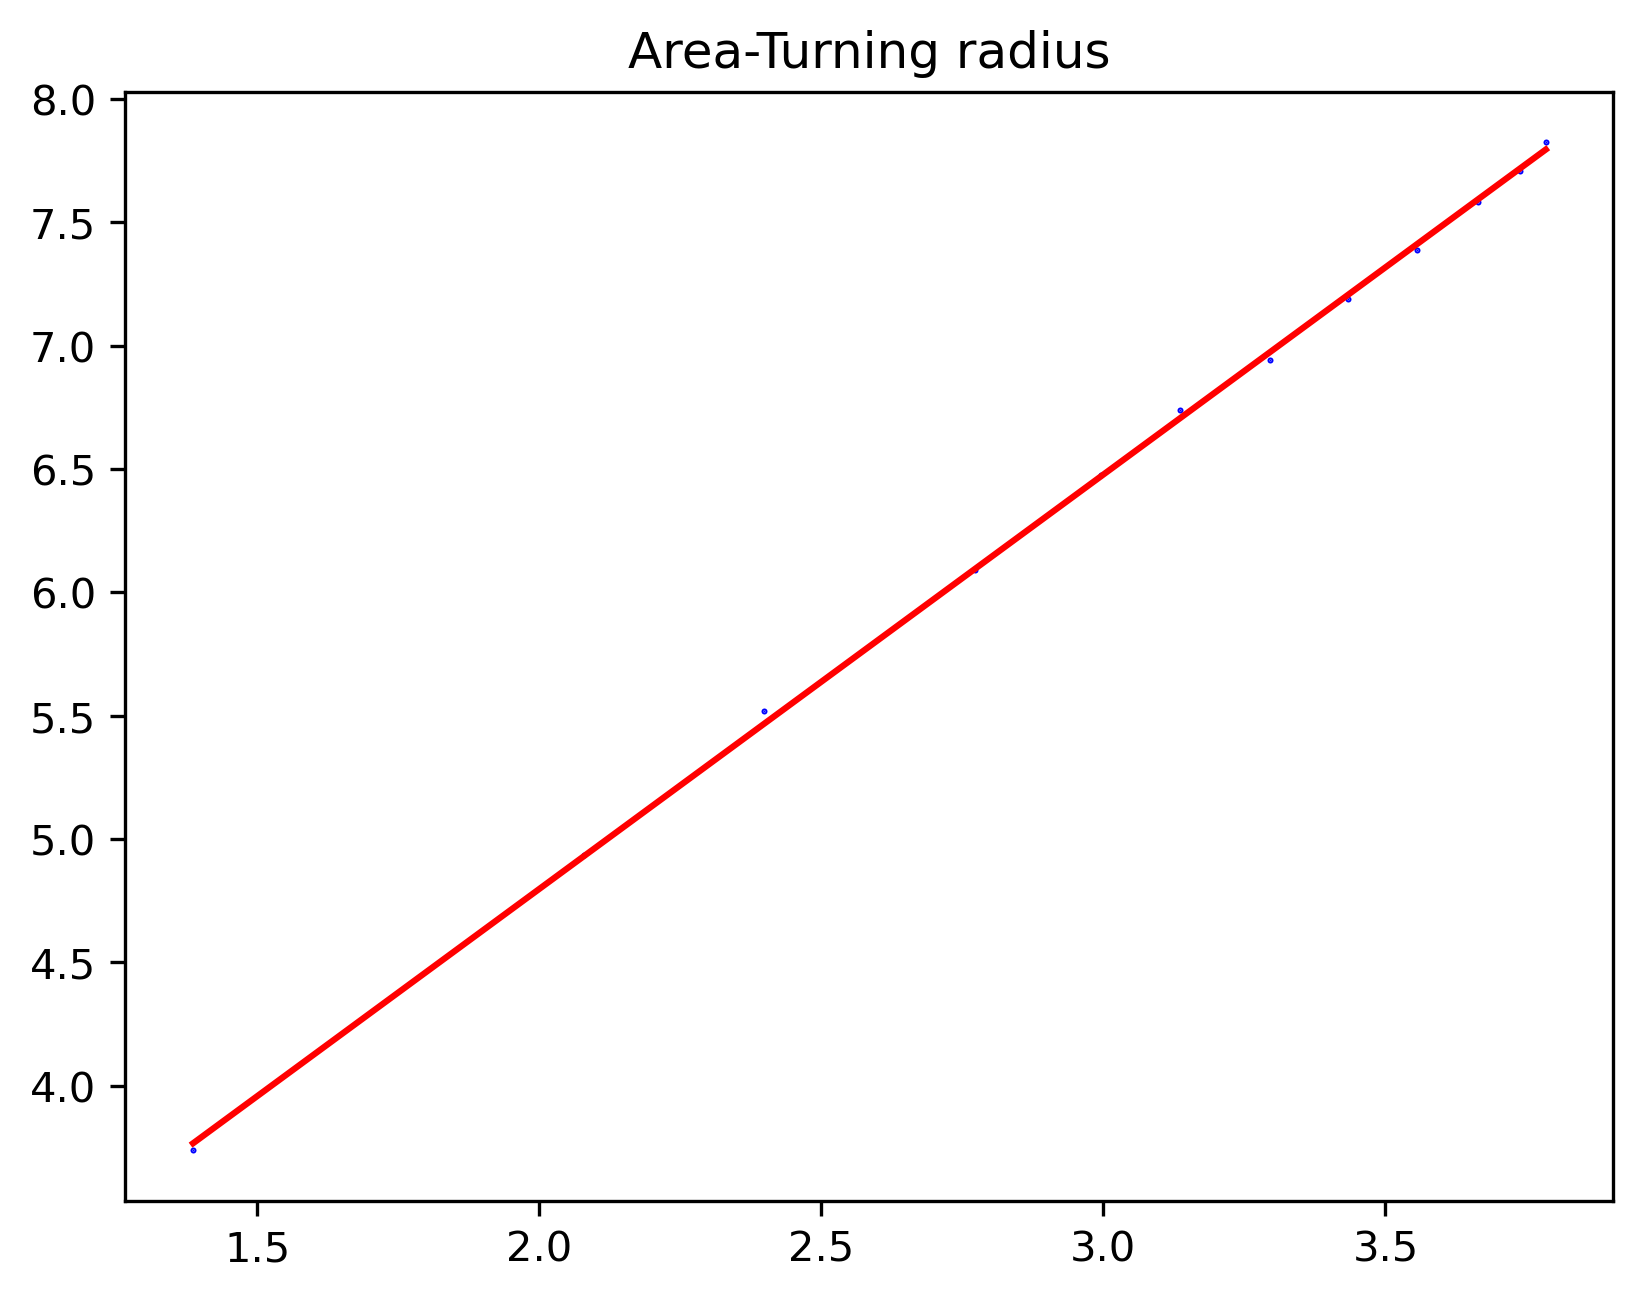

In [31]:
R = np.zeros(len(r),dtype=int)
for i in range(len(r)):
    r_sum = 0
    for xx in range(500-(r[i]-1)//2,500+(r[i]+1)//2):
        for yy in range(500-(r[i]-1)//2,500+(r[i]+1)//2):
            if run.state[xx,yy]==1:
                r_sum += (xx-500)**2+(yy-500)**2
    R[i] = np.sqrt(r_sum/N[i])

# Perform linear regression on the log-transformed data
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(R), np.log(N))

plt.figure(dpi=300) #分辨率
plt.scatter(np.log(R), np.log(N), color='blue', s=0.2)#透明度alpha；s点大小

# Add the linear regression line to the scatter plot
plt.plot(np.log(R), intercept + slope*np.log(R), color='red')

plt.title('Area-Turning radius')
plt.show()

In [32]:
print(slope)

1.6799069062030065
